In [4]:
# from pyspark.sql import SQLContext
from pyspark.sql.types import *
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive

In [5]:
sqlContext = SQLContext(sc)

df_co2uitstoot=sqlContext.read.load('../data/CO2Uitstoot/annual-co-emissions-per-country.csv', 
                        format='com.databricks.spark.csv', 
                        header='true',inferSchema='true')

df_temperaturen=sqlContext.read.load('../data/temperatuur/GlobalLandTemperaturesByCountry.csv', 
                        format='com.databricks.spark.csv', 
                        header='true',inferSchema='true')

In [6]:
df_co2 = df_co2uitstoot.createOrReplaceTempView("table1")
spark.sql("SELECT co from table1 where co IS NOT NULL ")

df_temp = df_temperaturen.createOrReplaceTempView("table2")
spark.sql("SELECT AverageTemperature from table2 where AverageTemperature IS NOT NULL ")

DataFrame[AverageTemperature: double]

In [7]:
# //Voor dropdown, country //
# kolom uit dataset halen en in een array (2d) plaatsten
# 2d array waarden uithalen en in een 1d array zetten

country = []
country.append(np.array(spark.sql("SELECT DISTINCT entity from table1 where entity IS NOT NULL ORDER BY ENTITY").collect()))

country_array2 = []
for i in range(len(country[0])):
    string = str(country[0][i][0])
    country_array2.append(string)


In [27]:
# dropdown adhv country
dropdown = widgets.Dropdown(
    options= country_array2,
    value=None,
    description='Country:',
    disabled=False,
)

dropdown

Dropdown(description='Country:', options=('Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', …

In [28]:
# //na dropdown, andere kolommen //
# kolom uit dataset halen en in een array (2d) plaatsten
co2uitstoot = []
co2uitstoot.append(np.array(spark.sql("SELECT co from table1 where co IS NOT NULL and year % 3 = 0 and year between 2001 and 2013 and Entity == '{0}'".format(dropdown.value)).collect()))

years = []
years.append(np.array(spark.sql("SELECT year from table1 where year IS NOT NULL and year % 3 = 0 and year between 2001 and 2013 and Entity == '{0}'".format(dropdown.value)).collect()))

temperaturen = []
temperaturen.append(np.array(spark.sql(" SELECT round(AVG(AverageTemperature)) FROM table2 where substring_index(dt,'-',1) % 3 = 0 and substring_index(dt,'-',1) between 2001 and 2013 AND Country == '{0}' GROUP BY substring_index(dt,'-',1) ORDER BY substring_index(dt,'-',1)".format(dropdown.value)).collect()))
                                                                                                                                                            #datum splitten tot eerste - in dit geval jaar

In [29]:
# 2d array waarden uithalen en in een 1d array zetten
co2_array2 = []
for i in range(len(co2uitstoot[0])):
    co2_array2.append(co2uitstoot[0][i][0])
    
years_array2 = []
for i in range(len(years[0])):
    string = str(years[0][i][0])
    years_array2.append(string)
    
temp_array2 = []
for i in range(len(temperaturen[0])):
    temp_array2.append(temperaturen[0][i][0])

In [30]:
print(co2_array2)
print(years_array2)
print(temp_array2)

[125.85, 128.76, 120.35, 113.35, 101.75]
['2001', '2004', '2007', '2010', '2013']
[11.0, 10.0, 11.0, 9.0, 10.0]


In [31]:
# Bar chart
def plot_bar_x():
    index = np.arange(len(years_array2))
    bar_width = 0.35
    opacity = 0.8
    bar_co2 = plt.bar(index, co2_array2, bar_width,
                 alpha=opacity,
                 color='b',
                 label='CO2 emissions (mln tons per capita)')
 
    bar_temp = plt.bar(index + bar_width, temp_array2, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Temp in °C')
    plt.xlabel('Years', fontsize=10)
    plt.xticks(index +bar_width, years_array2, fontsize=10, rotation=30)
    plt.title('Co2 uitstoot in vergelijking met temperaturen')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    


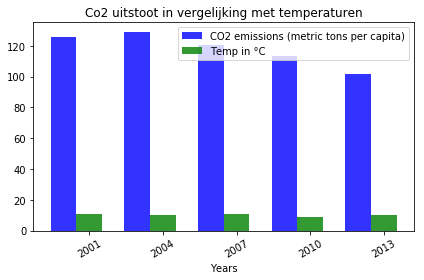

Belgium


In [32]:
plot_bar_x()
print(dropdown.value)